In [113]:
#@Author : Suganth Kumar
#Dataset : Used - Car Evaluation Dataset.
#Link to the Dataset: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
#Problem : Classification  - Determining the Class of used cars based on their attributes.
#Output Variable --Class:
#Possible Values
#Unacc - Unacceptable
#Acc - Acceptable
#Good - Good
#Vgood - Very Good

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np

In [33]:
#Read the data using pandas read csv function
car_data = pd.read_csv('car_data.csv',header='infer')

In [114]:
#glimse of the data
car_data.head()

,BuyingPrice,MaintPrice,Doors,Persons,lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [35]:
#Checking the information about the columns in the dataset.
#Useful for checking datatype and number of missing values in a featureset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
BuyingPrice    1728 non-null object
MaintPrice     1728 non-null object
Doors          1728 non-null object
Persons        1728 non-null object
lug_boot       1728 non-null object
Safety         1728 non-null object
Class          1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [36]:
#Descriptive Statistics of the features
car_data.describe(include=['O'])

,BuyingPrice,MaintPrice,Doors,Persons,lug_boot,Safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,3,more,big,low,unacc
freq,432,432,432,576,576,576,1210


In [117]:
car_data['BuyingPrice'].value_counts()

low      432
med      432
high     432
vhigh    432
Name: BuyingPrice, dtype: int64

# # Checking the distribution of class in the given dataset

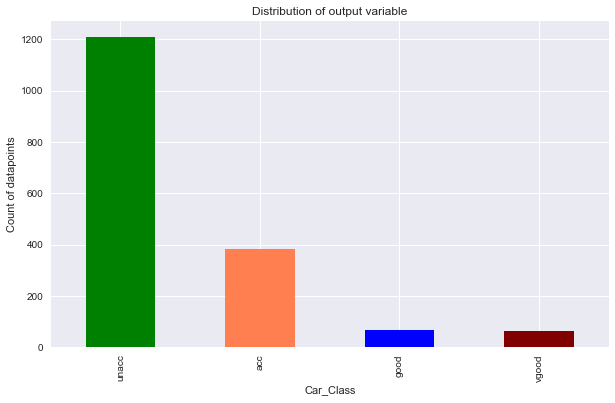

In [115]:
#We can see that data is skewed with classes not having equal distribution
plt.figure(figsize=(10,6))
car_data['Class'].value_counts().plot(kind='bar',color=['green','coral','blue','maroon'])
plt.title("Distribution of output variable")
plt.xlabel("Car_Class")
plt.ylabel("Count of datapoints")

# Analyzing the input features relationship with Class variable

In [40]:
#We can infer the cars which are classified as good and Vgood has a buying price which is low and medium
crosstab =pd.crosstab(car_data['Class'],car_data['BuyingPrice'])
crosstab

BuyingPrice,high,low,med,vhigh
Class,,,,
acc,108,89,115,72
good,0,46,23,0
unacc,324,258,268,360
vgood,0,39,26,0


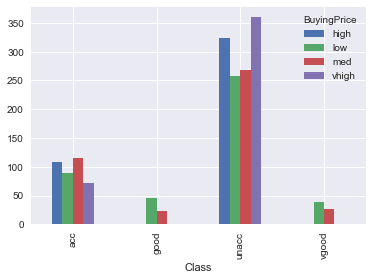

In [116]:
#Plotting the info to confirm the finding
crosstab.plot(kind='bar')

# Complete plots comparing Input vs Output

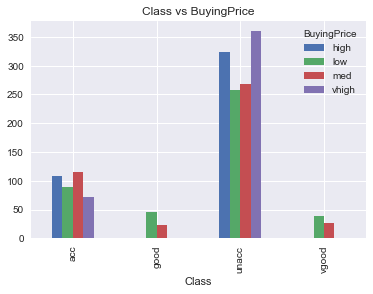

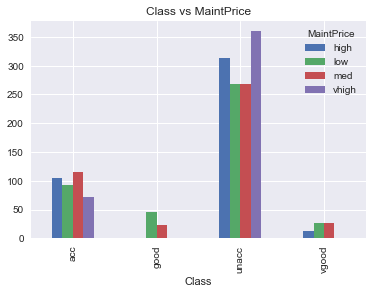

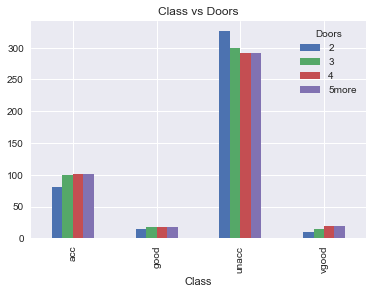

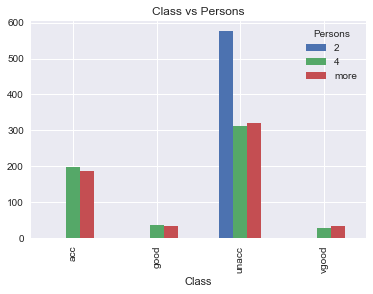

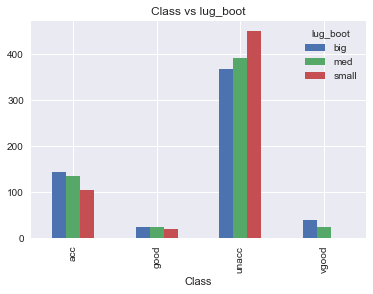

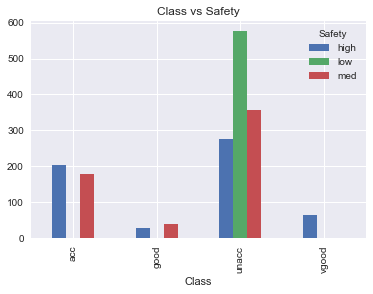

In [47]:
#Analyzing the other features with respect to the output variable to find the relationship

for i in car_data.columns:
    if(i!='Class'): 
        cross_tab = pd.crosstab(car_data['Class'],car_data[i])
        cross_tab.plot(kind='bar')
        plt.title("Class vs"+" "+i)

In [118]:
#One interesting observation is that here safety = high correctly classifies output of type Vgood
group2=car_data.groupby(['Class','Safety'])
group2.size()

Class  Safety
acc    high      204
       med       180
good   high       30
       med        39
unacc  high      277
       low       576
       med       357
vgood  high       65
dtype: int64

In [51]:
#Other important observation
# We could see that Persons variable correctly classifies the Unacceptable cars if the allowed persons is 2.
cross_tab = pd.crosstab(car_data['Class'],car_data['Persons'])
cross_tab

Persons,2,4,more
Class,,,
acc,0,198,186
good,0,36,33
unacc,576,312,322
vgood,0,30,35


# Input features and Output features

In [57]:
input_features = car_data.columns.drop('Class')
X= car_data[input_features]
y= car_data['Class'] #Output variable

# Splitting Training and Test data - Stratified Split

In [72]:
##Do a stratified split to ensure that your distribution of output variable is same in both train and test data set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [76]:
##Checking how the split has happened - to ensure class distribution
y_train.value_counts()/len(y_train)
y_test.value_counts()/len(y_test)

unacc    0.699422
acc      0.221580
good     0.040462
vgood    0.038536
Name: Class, dtype: float64

# Encoding the data as 0 to n-1 classes using label encoder

In [79]:
from sklearn.preprocessing import LabelEncoder

In [87]:
for columns in X_train.columns:
    if(X_train[columns].dtype == 'O'):
        encode = LabelEncoder()
        encode.fit(X_train[columns].values)
        X_train.loc[:,columns]=encode.transform(X_train[columns].values)

# Decision Tree Model Building

In [130]:
#Decision Tree model
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [131]:
#Encoding the Test data before processing
for columns in X_test.columns:
    if(X_test[columns].dtype == 'O'):
        encode = LabelEncoder()
        encode.fit(X_test[columns].values)
        X_test.loc[:,columns]=encode.transform(X_test[columns].values)

In [132]:
y_pred = tree_model.predict(X_test)

# Evaluation of the model

In [134]:
#The ones which we see in the diagonal are correctly classified
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,y_pred,labels=['unacc','acc','good','vgood'])

array([[356,   7,   0,   0],
       [  1, 112,   2,   0],
       [  0,   0,  21,   0],
       [  0,   1,   0,  19]])

In [135]:
## Based on the below report we can compare the recall and precision with our model's base value and confirm its use
#Recall = TP/(TP+FN)
#Precision = TP/(TP+FP)
print(classification_report(y_test,y_pred))


             precision    recall  f1-score   support

        acc       0.93      0.97      0.95       115
       good       0.91      1.00      0.95        21
      unacc       1.00      0.98      0.99       363
      vgood       1.00      0.95      0.97        20

avg / total       0.98      0.98      0.98       519



In [136]:
accuracy_score(y_test,y_pred) ##Overall accuracy of classification

0.97880539499036612